<h1>Sisällysluettelo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pörssikurssit" data-toc-modified-id="Pörssikurssit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pörssikurssit</a></span><ul class="toc-item"><li><span><a href="#Kirjastojen-tuonti" data-toc-modified-id="Kirjastojen-tuonti-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Kirjastojen tuonti</a></span></li><li><span><a href="#Muuttujien-määrittely" data-toc-modified-id="Muuttujien-määrittely-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Muuttujien määrittely</a></span></li><li><span><a href="#Tarvittavat-funktiot" data-toc-modified-id="Tarvittavat-funktiot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tarvittavat funktiot</a></span></li><li><span><a href="#Suorittava-osuus---Excelin-nouto-ja-analysointi" data-toc-modified-id="Suorittava-osuus---Excelin-nouto-ja-analysointi-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Suorittava osuus - Excelin nouto ja analysointi</a></span></li></ul></li></ul></div>

# Pörssikurssit
## Kirjastojen tuonti

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import os
import time
from datetime import datetime as dt
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

## Muuttujien määrittely

In [2]:
url = "http://www.nasdaqomxnordic.com/osakkeet/historiallisetkurssitiedot?languageId=4"
companies = ["YIT Oyj", "Kesko Oyj A", "Fortum Oyj"]
cur_dir = os.getcwd()
target_dir = "c:\\Temporary_downloads\\"
image_dir = "c:\\Temporary_downloads\\Images\\"
search_id = "instSearchHistorical"

search_autosuggest_xpath = "/html/body/ul[2]/li[2]/a/div[1]" 
from_date_id = "FromDate"
to_date_id = "ToDate"
download_link_id = "exportExcel"
options = Options()

options.add_experimental_option("prefs",
                               {"download.default_directory": target_dir})
year = timedelta(days=365)
day = timedelta(days=1)
one_year_diff = (dt.today() - year).strftime("%Y-%m-%d")
yesterday = (dt.today() - day).strftime("%Y-%m-%d")
plt.style.use("Solarize_Light2")

# x-ticks
myLoc = MultipleLocator(30)

# x-ticks
myFormat = DateFormatter("%d/%m")

## Tarvittavat funktiot

In [3]:
def get_excel():
    '''
    Täyttää kohdesivulla yrityksen nimen hakukenttään ja valitsee sen ehdotettujen yritysten listalta.
    Asetaa kohdesivun from date -kenttään päivämääräksi vuoden takaisen päivämäärän.
    Asettaa kohdesivun to date -kenttään päivämääräksi eilisen päivämäärän.
    Lataa / tallentaa tämän jälkeen sivulle ilmestyvän csv-tiedoston, joka sisältää haetun yrityksen viimeisen 
    vuoden pörssikurssit.
    '''
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    search = driver.find_element(By.ID, search_id)
    search.send_keys(company)
    time.sleep(2)
    driver.find_element(By.XPATH, search_autosuggest_xpath).click()
    from_date = driver.find_element(By.ID, from_date_id)
    from_date.clear()
    from_date.send_keys(one_year_diff)
    to_date = driver.find_element(By.ID, to_date_id)
    to_date.clear()
    to_date.send_keys(yesterday)
    time.sleep(2)
    
    driver.find_element(By.ID, download_link_id).click()
    time.sleep(5) 
    driver.close()


def latest_excel():
    '''
    Etsii kohdehakemistosta viimeksi muokatun tiedoston. Tässä oletetaan, että hakemisto sisältää vain
    tämän ohjelman noutamia / tallentamia Excel-tiedostoja, joiden muokkaaminen tapahtuu eri hakemistossa,
    jos niiden muokkaukselle ylipäätään on tarvetta.
    '''
    latest_file = None
    for file in os.listdir(target_dir):
        if os.path.isfile(target_dir + file):
            modTimeSinceEpoc = os.path.getmtime(target_dir + file)
            modified = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(modTimeSinceEpoc))
            if not latest_file:
                latest_file = (target_dir + file, modified)
            elif modified > latest_file[1]:
                latest_file = (target_dir + file, modified)
                
    return latest_file[0]

## Suorittava osuus - Excelin nouto ja analysointi
- Haetaan Excel
- Selvitetään tuorein Excel-tiedosto ja tulostetaan käsiteltävän tiedoston nimi.
- Muodostetaan dataframe, tehdään tarvittavia käsittelyjä ja muutetaan Closing price -sarakkeen tietotyyppi.
- Tehdään viivakaavio, jossa päätöskurssit sekä 14 päivän liukuvat keskiarvot.
- Tehdään toinen kaavio, jossa kuukausittaiset keskiarvohinnat.
- Tallennetaan muodostetut kaaviot .png-muotoisina.


Käsiteltävä Excel-tiedosto: c:\Temporary_downloads\YIT-2021-09-22-2022-09-21 (1).csv


,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,
2021-09-22,"4,774","4,778","4,714","4,82","4,71",4.782,"4,778",247773,"1183944,64",845
2021-09-23,"4,766","4,772","4,782","4,832","4,73",4.774,"4,783",178330,"852894,78",785
2021-09-24,"4,692","4,698","4,774","4,774","4,69",4.692,"4,711",163579,"770605,91",619
2021-09-27,"4,702","4,708","4,706","4,724","4,678",4.702,"4,70",155369,"730193,54",681
2021-09-28,"4,612","4,614","4,712","4,718","4,606",4.614,"4,64",297598,"1380733,38",1295



Käsiteltävä Excel-tiedosto: c:\Temporary_downloads\KESKOA-2021-09-22-2022-09-21 (1).csv


,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,
2021-09-22,"28,50","28,65","28,30","28,70","28,30",28.60,"28,498",25301,"720903,7",312
2021-09-23,"29,00","29,10","28,60","29,10","28,60",28.95,"28,953",25561,"740306,43",219
2021-09-24,"28,50","28,60","29,00","29,05","28,35",28.50,"28,644",19885,"569665,5",258
2021-09-27,"27,85","27,90","28,50","28,55","27,80",27.85,"28,059",37046,"1039888,15",320
2021-09-28,"27,20","27,35","27,85","27,95","27,15",27.30,"27,438",35030,"961123,42",319



Käsiteltävä Excel-tiedosto: c:\Temporary_downloads\FORTUM-2021-09-22-2022-09-21 (1).csv


,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,
2021-09-22,"25,91","25,92","25,98","26,16","25,65",25.91,"25,89",962588,"24921931,08",4232
2021-09-23,"26,26","26,28","26,13","26,40","26,13",26.29,"26,301",728609,"19163087,8",3761
2021-09-24,"25,83","25,85","26,30","26,30","25,82",25.82,"25,892",906346,"23469722,86",3694
2021-09-27,"26,26","26,28","26,02","26,29","25,95",26.25,"26,175",1019648,"26681336,03",5176
2021-09-28,"26,26","26,29","26,34","26,58","26,15",26.25,"26,316",1424816,"37499120,47",6503


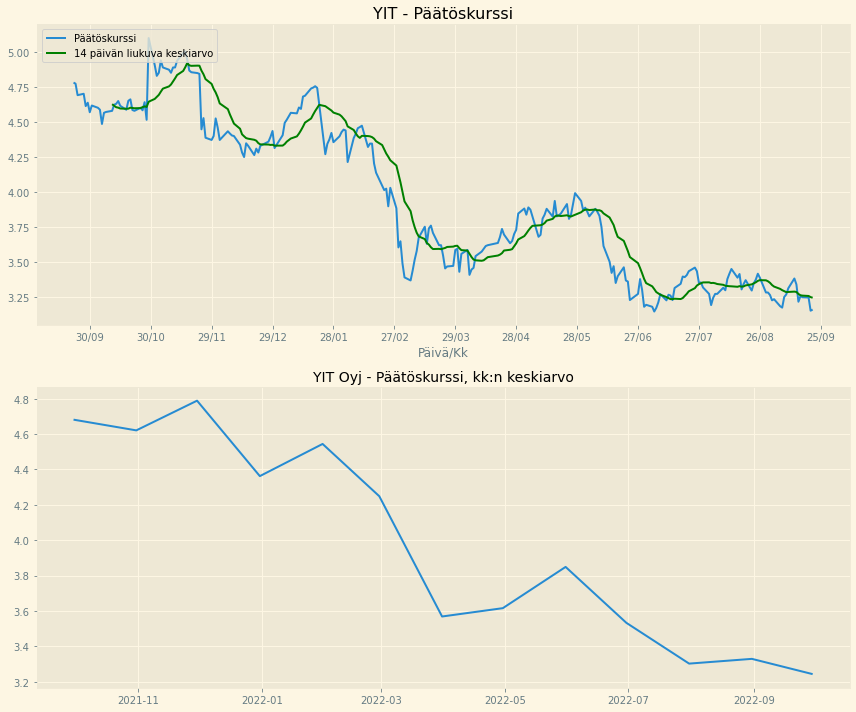

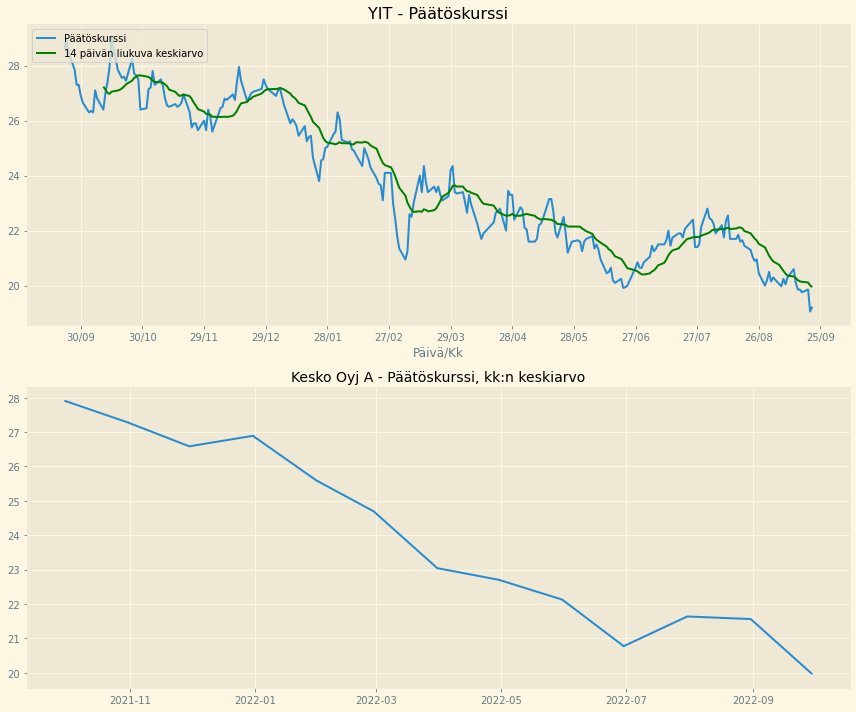

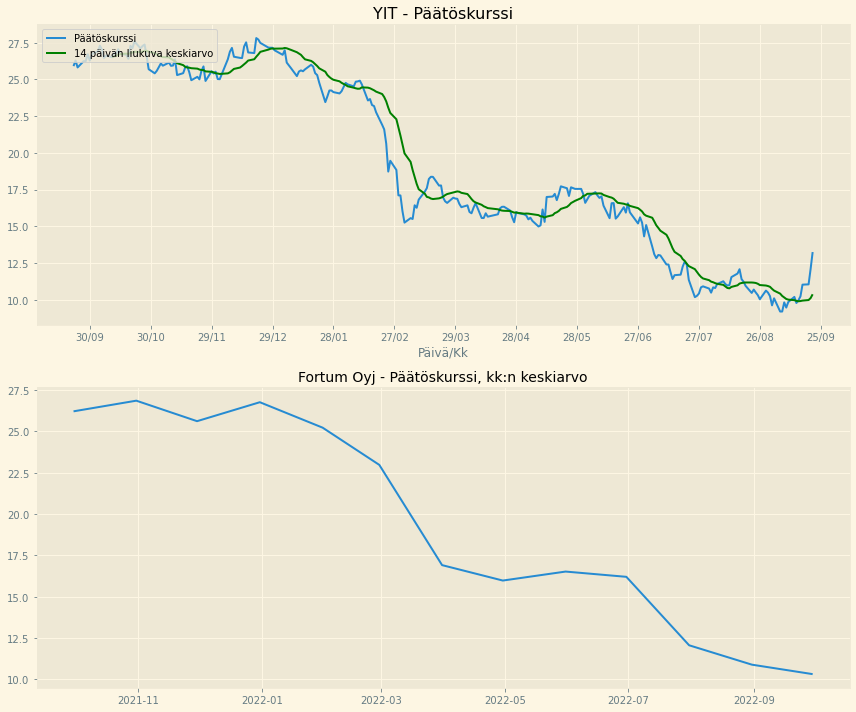

In [4]:
for company in companies:
    get_excel()
    latest = latest_excel()
    timestamp = dt.now().strftime("%Y-%m-%d %H.%M.%S")
    print(f"\nKäsiteltävä Excel-tiedosto: {latest.rsplit('/')[-1]}")
    df = pd.read_csv(latest, sep=";", skiprows=1, index_col="Date", parse_dates=True)
    df = df.drop("Unnamed: 11", axis=1)
    df = df.sort_index()
    df = df.replace(",", ".")
    df["Closing price"] = df["Closing price"].str.replace(",", ".").astype("float")
    display(df.head())

    fig, ax = plt.subplots(2, 1, figsize=(12, 10))
    ax[0].plot(df["Closing price"], label="Päätöskurssi")
    ax[0].plot(df["Closing price"].rolling(14).mean(), color="g", label="14 päivän liukuva keskiarvo")
    ax[0].set_title(company + " - Päätöskurssi")
    ax[0].xaxis.set_major_locator(myLoc)
    ax[0].xaxis.set_major_formatter(myFormat)
    ax[0].set_xlabel("Päivä/Kk")
    ax[0].legend(loc="upper left")

    # Kuukausittaiset keskiarvohinnat
    ax[1].plot(df["Closing price"].resample("M").mean())
    ax[1].set_title(company + " - Päätöskurssi, kk:n keskiarvo", size=14)
    plt.tight_layout()
    plt.savefig(image_dir + company + "päätöskurssit ja kk keskiarvo" + timestamp + ".png");